<a href="https://colab.research.google.com/github/praveenpareek11/transfer-learning/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#"Set the path to google drive, so module groceries.py can be imported"
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/transfer-learning')

In [0]:
#"Import necessary libraries."
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
import groceries
import matplotlib.pyplot as plt

In [0]:
#"Load dataset"
(x_train, y_train_raw), (x_test, y_test_raw), class_names = groceries.load_data()

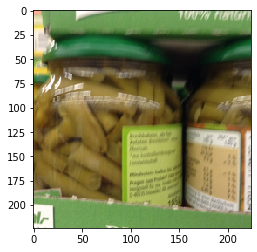

In [5]:
# take a look at the kinds of images we're dealing with
plt.imshow(x_train[100].astype(int))

In [6]:
# Print out the classes we need to target
class_names

['BEANS',
 'CAKE',
 'CANDY',
 'CEREAL',
 'CHIPS',
 'CHOCOLATE',
 'COFFEE',
 'CORN',
 'FISH',
 'FLOUR',
 'HONEY',
 'JAM',
 'JUICE',
 'MILK',
 'NUTS',
 'OIL',
 'PASTA',
 'RICE',
 'SODA',
 'SPICES',
 'SUGAR',
 'TEA',
 'TOMATO_SAUCE',
 'VINEGAR',
 'WATER']

(array([639., 439., 672., 199., 406., 602., 295., 504., 381., 560.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

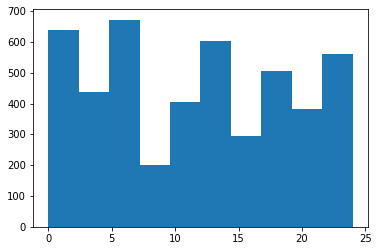

In [7]:
# check how balanced our class distribution is
plt.hist(y_train_raw)

In [0]:
# One hot encode ouput
y_train = keras.utils.to_categorical(y_train_raw)
y_test = keras.utils.to_categorical(y_test_raw)

In [9]:
# We build an extremely simple perceptron to try to fit our data

x_train_normalized = x_train / 255.
x_test_normalized = x_test / 255.

very_simple_model=Sequential()
very_simple_model.add(Flatten())
very_simple_model.add(Dense(25, activation="sigmoid"))
very_simple_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

very_simple_model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4697 samples, validate on 250 samples
Epoch 1/10





4697/4697 [==============================] - 14s 3ms/step - loss: 9.5593 - acc: 0.0270 - val_loss: 10.5919 - val_acc: 0.0400
Epoch 2/10
4697/4697 [==============================] - 14s 3ms/step - loss: 9.5678 - acc: 0.0268 - val_loss: 10.5919 - val_acc: 0.0400
Epoch 3/10
4697/4697 [==============================] - 14s 3ms/step - loss: 9.5678 - acc: 0.0268 - val_loss: 10.5919 - val_acc: 0.0400
Epoch 4/10
4697/4697 [==============================] - 14s 3ms/step - loss: 9.5678 - acc: 0.0268 - val_loss: 10.5919 - val_acc: 0.0400
Epoch 5/10
4697/4697 [==============================] - 14s 3ms/step - loss: 9.5678 - acc: 0.0268 - val_loss: 10.5919 - val_acc: 0.0400
Epoch 6/10
4697/4697 [==============================] - 14s 3ms/step - loss: 9.5678 - acc: 0.0268 - val_loss: 10.5919 - val_acc: 0.0400
Epoch 7/10
4697/4697 [========

In [10]:
# Load ResNet50 Trained on imagenet
resnet_model = ResNet50(weights="imagenet")

In [11]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [12]:
from keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/My Drive/Colab Notebooks/transfer-learning/elephant.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = resnet_model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


Predicted: [('n01871265', 'tusker', 0.48542634), ('n02504013', 'Indian_elephant', 0.343293), ('n02504458', 'African_elephant', 0.1712514)]


In [0]:
# We should preprocess the images the same way resnet images were preprocessed
x_train_preprocessed = preprocess_input(x_train)
x_test_preprocessed = preprocess_input(x_test)

In [14]:
# Build a new model that is ResNet50 minus the very last layer
last_layer = resnet_model.get_layer("avg_pool")

resnet_layers = keras.Model(inputs=resnet_model.inputs, outputs=last_layer.output)
resnet_layers.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
# We use our resnet to "predict" but because we have removed the top layer, 
# this outputs the activations of the second to last layer on our dataset

x_train_features = resnet_layers.predict(x_train_preprocessed)

In [0]:
x_test_features = resnet_layers.predict(x_test_preprocessed)

In [0]:
feature_model=Sequential()
feature_model.add(Dense(25, activation="sigmoid"))
feature_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
feature_model.fit(x_train_features, y_train, epochs=50, validation_data=(x_test_features, y_test))

Train on 4697 samples, validate on 250 samples
Epoch 1/50
4697/4697 [==============================] - 2s 329us/step - loss: 1.6293 - acc: 0.5184 - val_loss: 1.3216 - val_acc: 0.5960
Epoch 2/50
4697/4697 [==============================] - 0s 76us/step - loss: 0.6919 - acc: 0.7992 - val_loss: 1.0792 - val_acc: 0.6560
Epoch 3/50
4697/4697 [==============================] - 0s 74us/step - loss: 0.4675 - acc: 0.8759 - val_loss: 0.9831 - val_acc: 0.7120
Epoch 4/50
4697/4697 [==============================] - 0s 76us/step - loss: 0.3406 - acc: 0.9172 - val_loss: 0.8432 - val_acc: 0.7240
Epoch 5/50
4697/4697 [==============================] - 0s 74us/step - loss: 0.2564 - acc: 0.9502 - val_loss: 0.8789 - val_acc: 0.7240
Epoch 6/50
4697/4697 [==============================] - 0s 74us/step - loss: 0.2050 - acc: 0.9636 - val_loss: 0.8304 - val_acc: 0.7280
Epoch 7/50
4697/4697 [==============================] - 0s 74us/step - loss: 0.1555 - acc: 0.9823 - val_loss: 0.8753 - val_acc: 0.7480
Epoch 8

In [19]:
# We can directly stich the models together

new_model=Sequential()
new_model.add(resnet_layers)
new_model.add(Dense(25, activation="sigmoid"))

new_model.layers[0].trainable=False

new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 25)                51225     
Total params: 23,638,937
Trainable params: 51,225
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
new_model.fit(x_train_preprocessed, y_train, epochs=50, validation_data=(x_test_preprocessed, y_test))

In [0]:
# We can allow some of the resnet layers to change as we train.  
# Typically you would want to lower the learning rate in conjunction with this.

new_model.layers[0].trainable = True

# We let the last 3 blocks train
for layer in new_model.layers[0].layers[:-11]:
    layer.trainable = False
for layer in new_model.layers[0].layers[-11:]:
    layer.trainable = True
    
new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

new_model.fit(x_train_preprocessed, y_train, epochs=50, validation_data=(x_test_preprocessed, y_test))